Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

1. Import the required libraries and modules that you would need.
2. Read that data into Python and call the dataframe churnData.
3. Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
4. Check for null values in the dataframe. Replace the null values.
5. Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
    5.a. Scale the features either by using normalizer or a standard scaler.
    5.b. Split the data into a training set and a test set.
    5.c. Fit a logistic Regression model on the training data.
    5.d. Fit a Knn Classifier model on the training data

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
pd.options.display.max_rows = 50
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
# read data
churnData = pd.read_csv("Data/DATA_Customer-Churn.csv")

In [3]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


3. Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [4]:
print(set([type(item) for item in churnData["TotalCharges"]]))

{<class 'str'>}


In [5]:
churnData['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [6]:
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors='coerce')

In [7]:
print(set([type(item) for item in churnData["TotalCharges"]]))

{<class 'float'>}


4. Check for null values in the dataframe. Replace the null values.

In [8]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
mean_TotalCharges=np.mean(churnData['TotalCharges'])
churnData['TotalCharges']= churnData['TotalCharges'].fillna(mean_TotalCharges)

In [10]:
churnData.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
churnData['Churn'] = churnData['Churn'].replace({'Yes': "1"})

In [12]:
churnData['Churn'] = churnData['Churn'].replace({'No': "0"})
churnData['Churn'].unique()

array(['0', '1'], dtype=object)

In [13]:
print(set([type(item) for item in churnData["Churn"]]))

{<class 'str'>}


In [14]:
churnData["Churn"] = pd.to_numeric(churnData["Churn"], errors='coerce')

In [15]:
print(set([type(item) for item in churnData["Churn"]]))

{<class 'int'>}


5. Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

    5.a. Scale the features either by using normalizer or a standard scaler.

In [16]:
new_churnData = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn']]
new_churnData

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,0
1,34,0,56.95,1889.50,0
2,2,0,53.85,108.15,1
3,45,0,42.30,1840.75,0
4,2,0,70.70,151.65,1
...,...,...,...,...,...
7038,24,0,84.80,1990.50,0
7039,72,0,103.20,7362.90,0
7040,11,0,29.60,346.45,0
7041,4,1,74.40,306.60,1


# Logistic Regression & Standard Scaler

## Defining X, y

In [17]:
X = new_churnData.drop(columns=["Churn"], axis=1)
y = new_churnData["Churn"]

## Data Splitting

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

## getting value counts on numpy array

In [19]:
np.unique(y, return_counts=True)

(array([0, 1]), array([5174, 1869]))

## Logistic regresion

,Error_metric,Train,Test
0,Accuracy,0.78,0.77
1,Precision,0.62,0.62
2,Recall,0.45,0.42


Confusion matrix for the train set
[[3273  360]
 [ 713  584]]


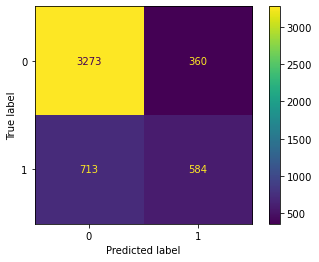



Confusion matrix for the test set
[[1392  149]
 [ 330  242]]


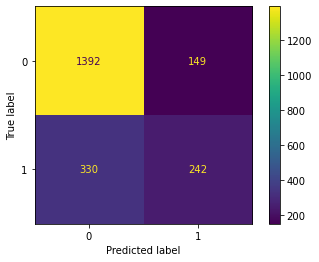

In [91]:
log_model = LogisticRegression() 

trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

## Logistic regression
log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

# KNN Classifier

In [83]:
## StandardScaler
from sklearn.linear_model import LogisticRegression
log_model = KNeighborsClassifier() 

## Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.77,0.75
1,Precision,0.58,0.55
2,Recall,0.44,0.37


Confusion matrix for the train set
[[3673  470]
 [ 840  651]]


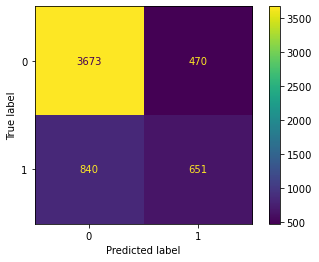



Confusion matrix for the test set
[[916 115]
 [239 139]]


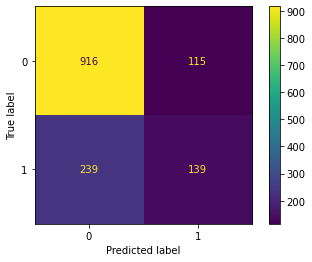

In [84]:
##KNNClassifier

log_model.fit(X_train_mod, y_train)
y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

# Decision trees

,Error_metric,Train,Test
0,Accuracy,0.78,0.77
1,Precision,0.64,0.65
2,Recall,0.33,0.31


Confusion matrix for the train set
[[3396  869]
 [ 237  428]]


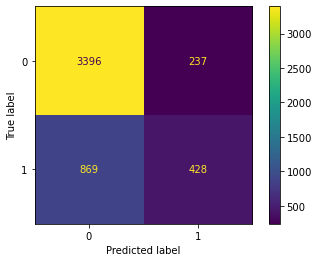



Confusion matrix for the test set
[[1443  393]
 [  98  179]]


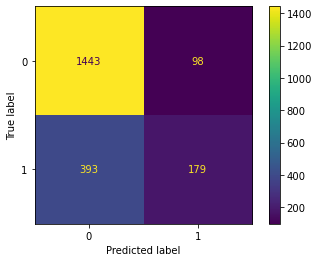

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

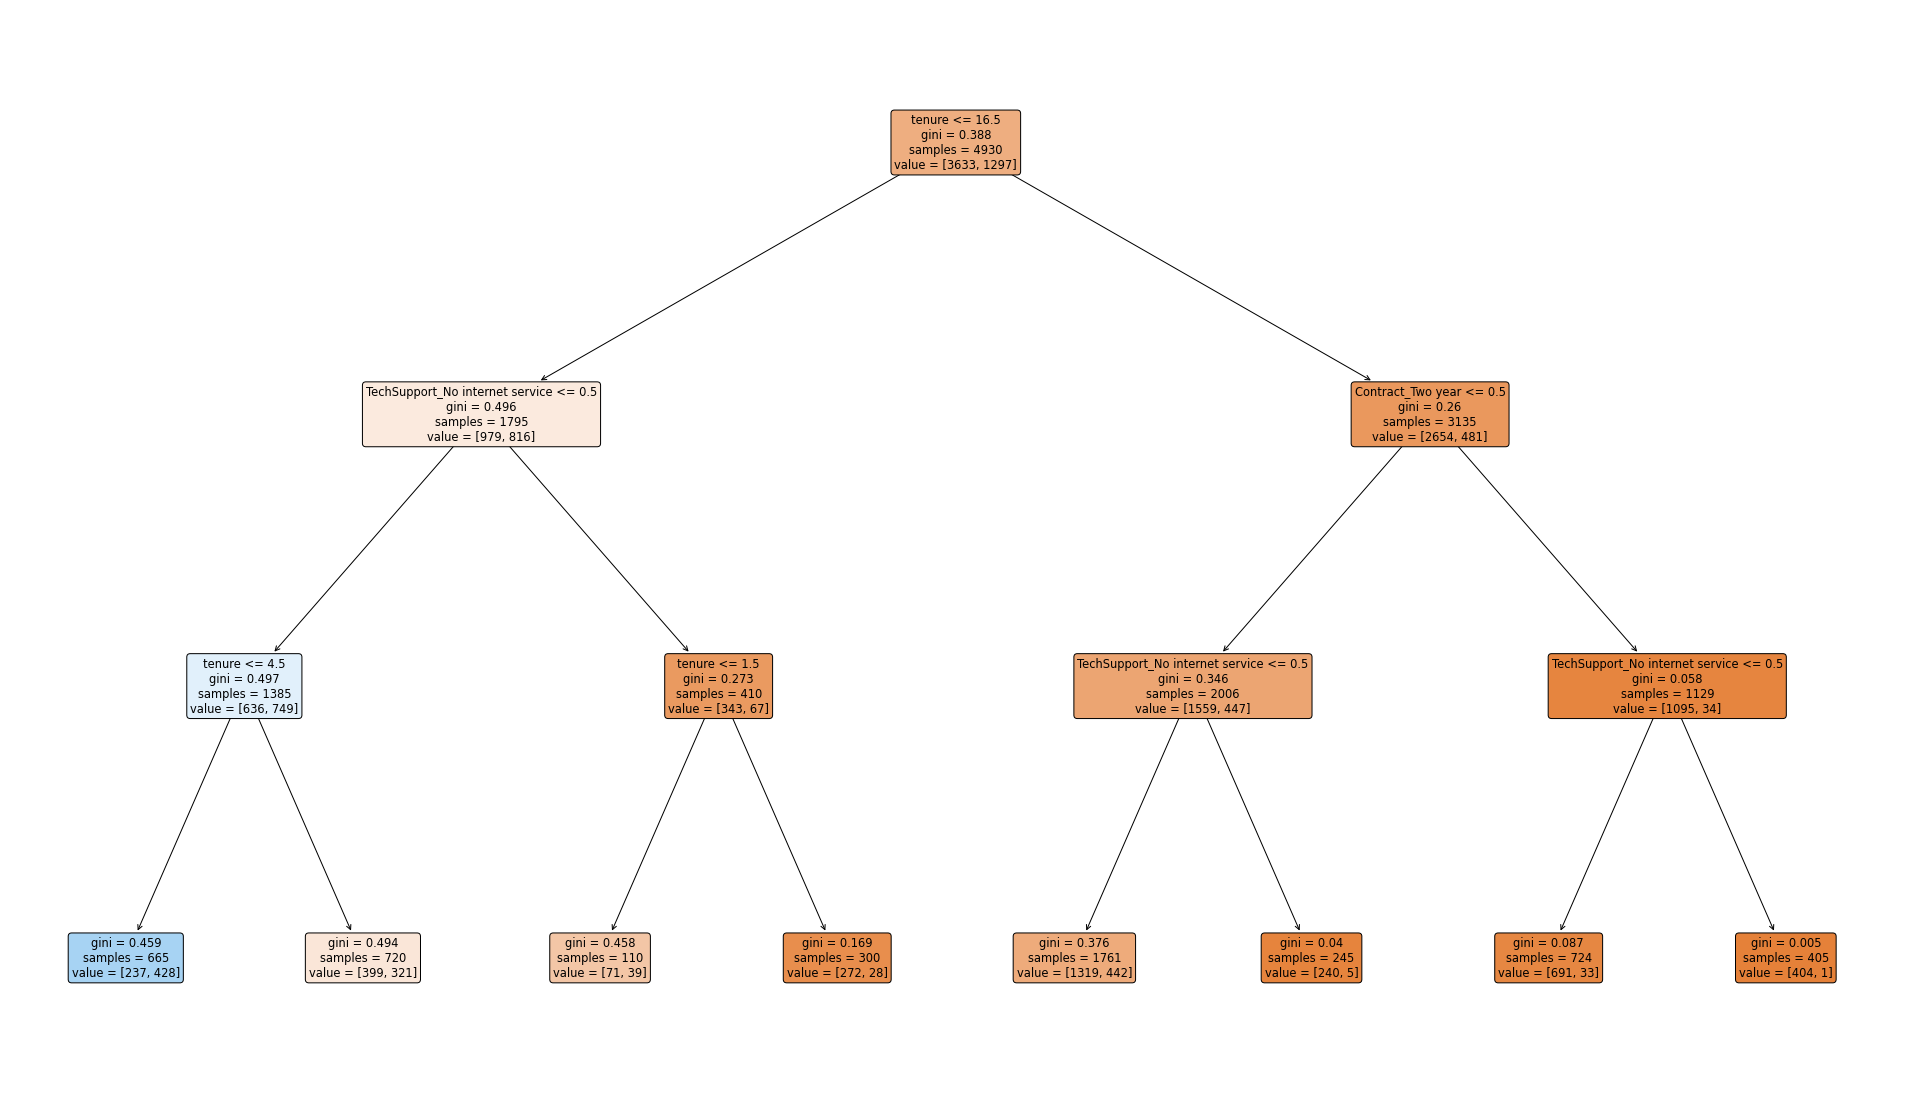

In [86]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

# categorical

In [31]:
categoricals_features= churnData.select_dtypes("object")
categoricals_features

,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year
2,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year
4,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year
7039,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year
7040,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month
7041,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month


In [32]:
# get dummies pandas
categoricals_features = pd.get_dummies(categoricals_features, drop_first=True)

In [33]:
categoricals_features

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Split X, y

In [34]:
X = categoricals_features
y = new_churnData["Churn"]

# data splitting

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

## Logistic regresion

,Error_metric,Train,Test
0,Accuracy,0.78,0.77
1,Precision,0.62,0.62
2,Recall,0.45,0.42


Confusion matrix for the train set
[[3273  360]
 [ 713  584]]


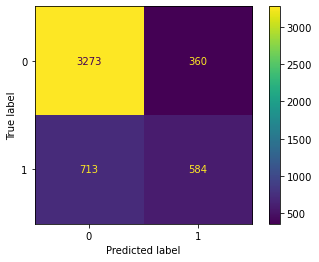



Confusion matrix for the test set
[[1392  149]
 [ 330  242]]


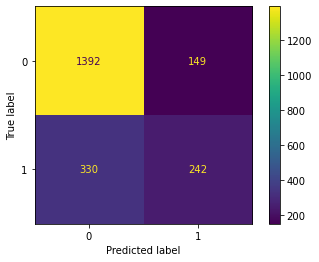

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


## Randond_state should be included also here
log_model = LogisticRegression(random_state=11) 

trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)
## Logistic regression
log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

# KNNClassifier - Categorical

In [88]:
## StandardScaler
from sklearn.linear_model import LogisticRegression
log_model = KNeighborsClassifier() 

## Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.77,0.75
1,Precision,0.58,0.55
2,Recall,0.44,0.37


Confusion matrix for the train set
[[3673  470]
 [ 840  651]]


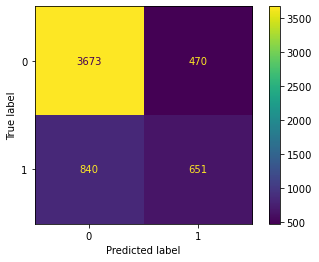



Confusion matrix for the test set
[[916 115]
 [239 139]]


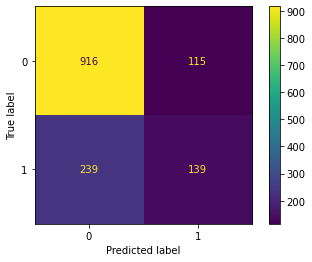

In [89]:
##KNNClassifier

log_model.fit(X_train_mod, y_train)
y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

# Decision trees

,Error_metric,Train,Test
0,Accuracy,0.74,0.74
1,Precision,0.51,0.51
2,Recall,0.72,0.73


Confusion matrix for the train set
[[3114  424]
 [1024 1072]]


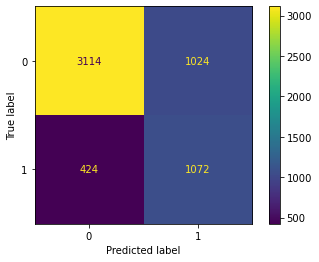



Confusion matrix for the test set
[[772 102]
 [264 271]]


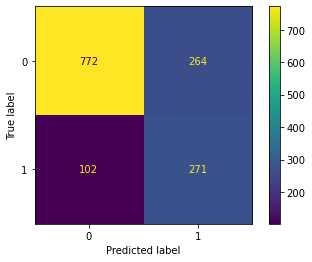

In [45]:
# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=4)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

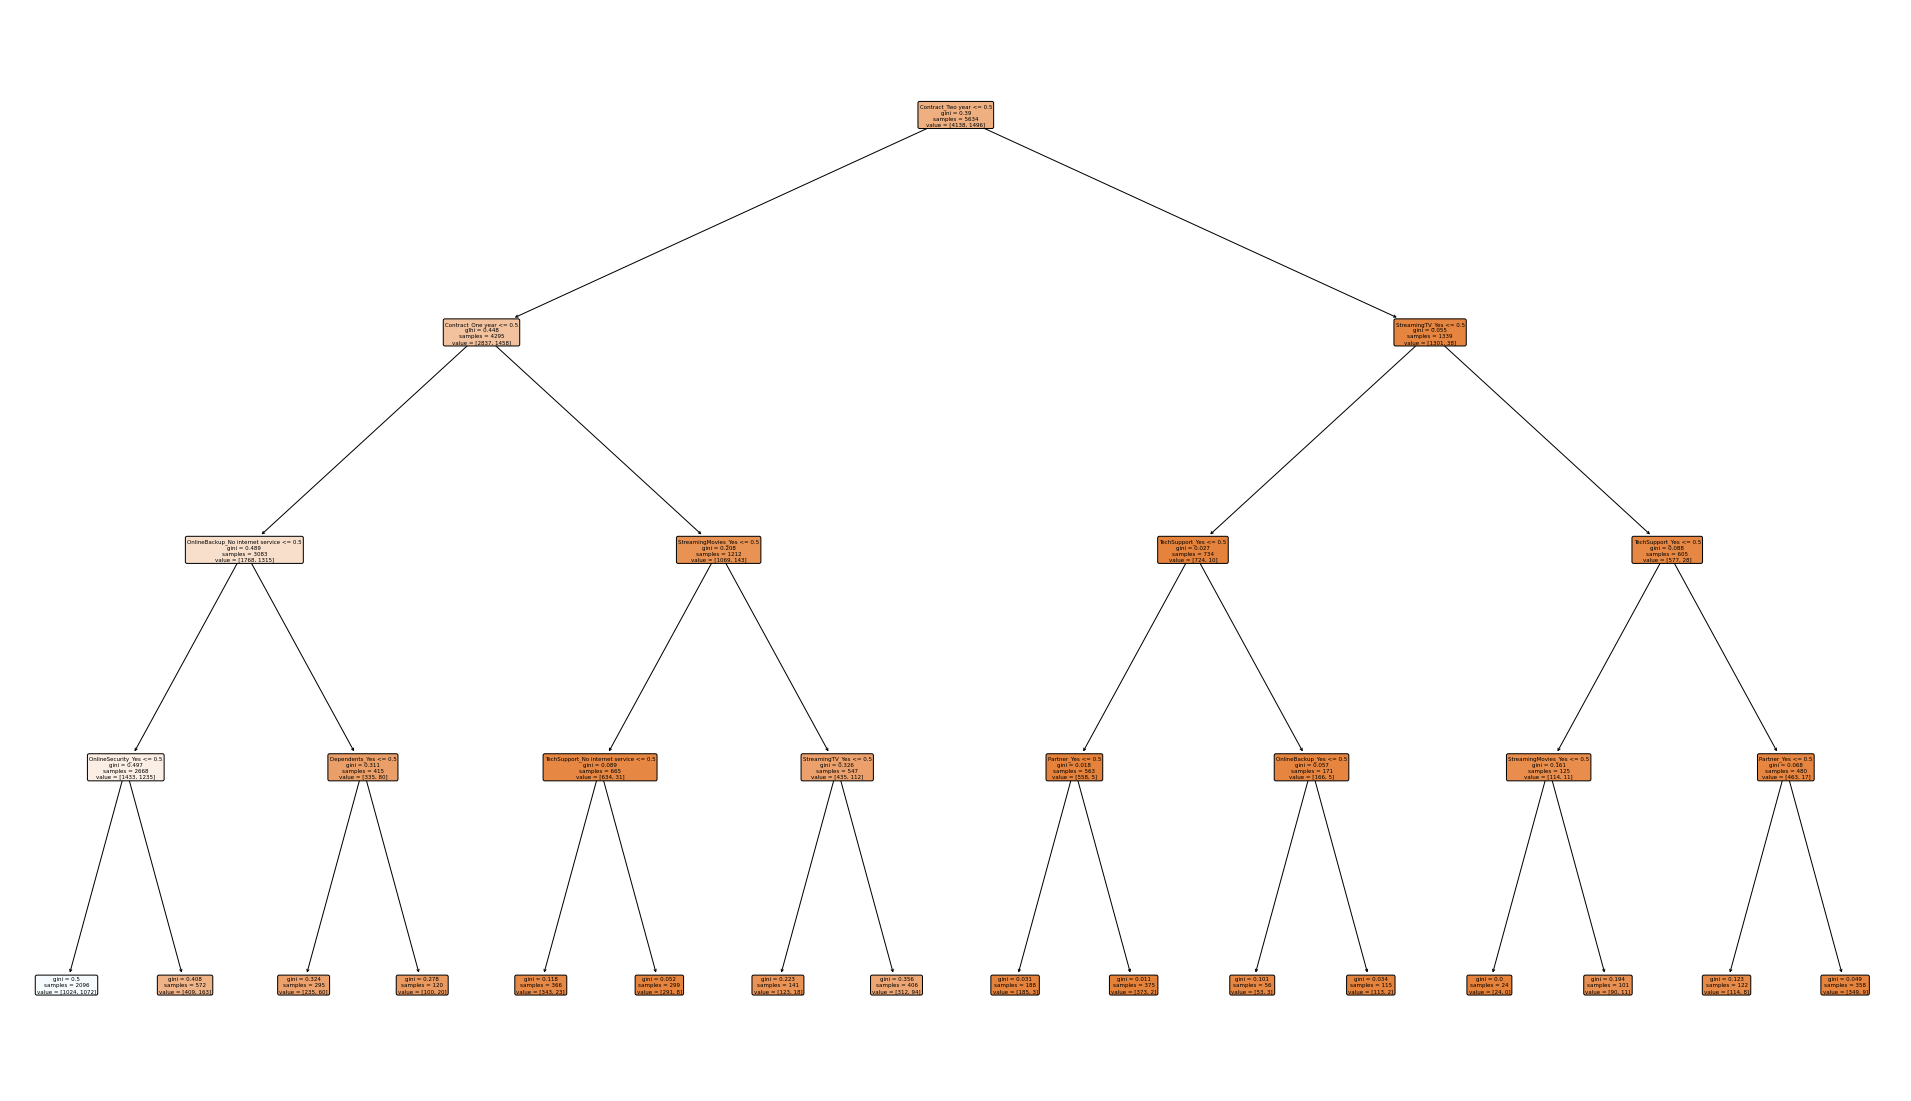

In [46]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

# Split X, y

In [47]:
# all data
X = pd.concat(([new_churnData,categoricals_features]), axis=1).drop(columns=["Churn"])
y= new_churnData["Churn"]

## Data splitting 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

## Logistic regresion

,Error_metric,Train,Test
0,Accuracy,0.80,0.82
1,Precision,0.67,0.69
2,Recall,0.50,0.56


Confusion matrix for the train set
[[3776  362]
 [ 755  741]]


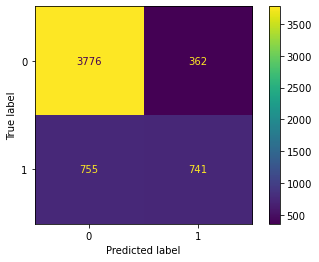



Confusion matrix for the test set
[[942  94]
 [165 208]]


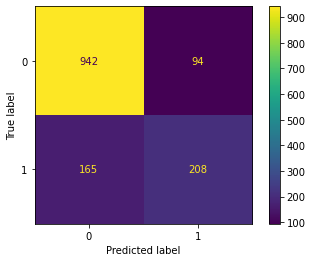

In [49]:
log_model = LogisticRegression(random_state=11) 

## Data splitting
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

# Model evaluation

In [50]:
def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    ME_train = np.mean(np.exp(y_train)-np.exp(y_pred_train))
    ME_test  = np.mean(np.exp(y_test)-np.exp(y_pred_test))

    MAE_train = mean_absolute_error(np.exp(y_train),np.exp(y_pred_train))
    MAE_test  = mean_absolute_error(np.exp(y_test),np.exp(y_pred_test))

    MSE_train = mean_squared_error(np.exp(y_train),np.exp(y_pred_train))
    MSE_test  = mean_squared_error(np.exp(y_test),np.exp(y_pred_test))

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(np.exp(y_train)-np.exp(y_pred_train)) / np.exp(y_train))* 100.)
    MAPE_test  = np.mean((np.abs(np.exp(y_test)-np.exp(y_pred_test)) / np.exp(y_test))* 100.)

    R2_train = r2_score(np.exp(y_train),np.exp(y_pred_train))
    R2_test  = r2_score(np.exp(y_test),np.exp(y_pred_test))

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': np.exp(y_train), 'Predicted': np.exp(y_pred_train)})
    df_test  = pd.DataFrame({'Real': np.exp(y_test),  'Predicted': np.exp(y_pred_test)})

    return performance, df_train, df_test

# Knn

In [51]:
# initialize model (set parameters)
neigh = KNeighborsRegressor(n_neighbors=4) # n_neighbors = K

In [52]:
neigh.fit(X_train, y_train) # Minkowski distance with p = 2 -> Euclidean distance

KNeighborsRegressor(n_neighbors=4)

# Making predictions

In [53]:
# make predictions
y_pred_train_knn = neigh.predict(X_train)
y_pred_test_knn  = neigh.predict(X_test)

performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
performance_knn

,Error_metric,Train,Test
0,Mean error,0.09,0.08
1,Mean absolute error,0.36,0.45
2,Mean squared error,0.34,0.49
3,Root mean squared error,0.58,0.70
4,Mean absolute percentual error,22.10,28.33
5,R2,0.41,0.15


In [54]:
# for loop to try many values of k

full = pd.DataFrame()

models = {'k': [] }

for k in range(2,21):

    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)

    models['k'] = [k, neigh]

    y_pred_train_knn = neigh.predict(X_train)
    y_pred_test_knn  = neigh.predict(X_test)

    performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
    temp = pd.DataFrame({'k': [k]*6, 'Error_metric': performance_knn['Error_metric'], 
                         'Train': performance_knn['Train'], 'Test': performance_knn['Test']})
    full = pd.concat([full,temp], axis=0)

full

,k,Error_metric,Train,Test
0,2,Mean error,0.05,0.06
1,2,Mean absolute error,0.25,0.45
2,2,Mean squared error,0.23,0.55
3,2,Root mean squared error,0.48,0.74
4,2,Mean absolute percentual error,15.60,28.84
5,2,R2,0.60,0.04
0,3,Mean error,0.08,0.07
1,3,Mean absolute error,0.33,0.45
2,3,Mean squared error,0.30,0.51
3,3,Root mean squared error,0.55,0.71


## Checking for overfitting

In [55]:
full[full['Error_metric'] == 'R2']

,k,Error_metric,Train,Test
5,2,R2,0.60,0.04
5,3,R2,0.48,0.11
5,4,R2,0.41,0.15
5,5,R2,0.37,0.18
5,6,R2,0.34,0.19
5,7,R2,0.33,0.20
5,8,R2,0.31,0.21
5,9,R2,0.31,0.21
5,10,R2,0.30,0.22
5,11,R2,0.29,0.23


In [56]:
full2 = full.melt(id_vars=['k','Error_metric'])
full2

,k,Error_metric,variable,value
0,2,Mean error,Train,0.05
1,2,Mean absolute error,Train,0.25
2,2,Mean squared error,Train,0.23
3,2,Root mean squared error,Train,0.48
4,2,Mean absolute percentual error,Train,15.60
...,...,...,...,...
223,20,Mean absolute error,Test,0.46
224,20,Mean squared error,Test,0.44
225,20,Root mean squared error,Test,0.66
226,20,Mean absolute percentual error,Test,27.68


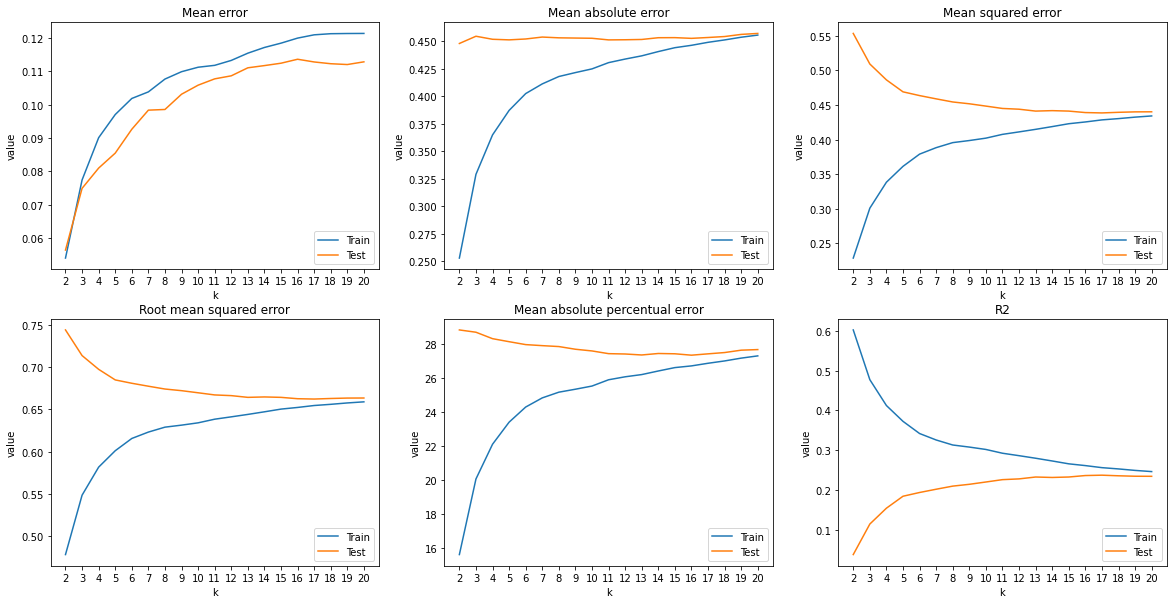

In [57]:
%matplotlib inline

#metrics = ['Mean error',]'Mean absolute error',...]

fig, ax = plt.subplots(2,3, figsize=(20,10))
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean error'], hue = 'variable', ax = ax[0,0])
ax[0,0].set_xticks(range(2,21))
ax[0,0].set_title("Mean error")
ax[0,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute error'], hue = 'variable', ax = ax[0,1])
ax[0,1].set_xticks(range(2,21))
ax[0,1].set_title("Mean absolute error")
ax[0,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean squared error'], hue = 'variable', ax = ax[0,2])
ax[0,2].set_xticks(range(2,21))
ax[0,2].set_title("Mean squared error")
ax[0,2].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Root mean squared error'], hue = 'variable', ax = ax[1,0])
ax[1,0].set_xticks(range(2,21))
ax[1,0].set_title("Root mean squared error")
ax[1,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute percentual error'], hue = 'variable', ax = ax[1,1])
ax[1,1].set_xticks(range(2,21))
ax[1,1].set_title("Mean absolute percentual error")
ax[1,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'R2'], hue = 'variable', ax = ax[1,2])
ax[1,2].set_xticks(range(2,21))
ax[1,2].set_title("R2")
ax[1,2].legend(loc='lower right')

# Decision trees

,Error_metric,Train,Test
0,Accuracy,0.79,0.80
1,Precision,0.65,0.66
2,Recall,0.48,0.49


Confusion matrix for the train set
[[3756  783]
 [ 382  713]]


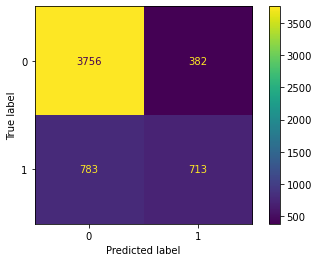



Confusion matrix for the test set
[[943 191]
 [ 93 182]]


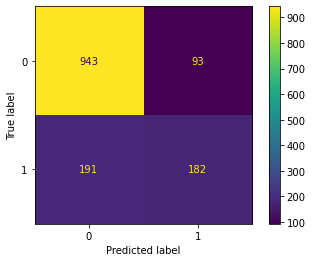

In [58]:
# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=4)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

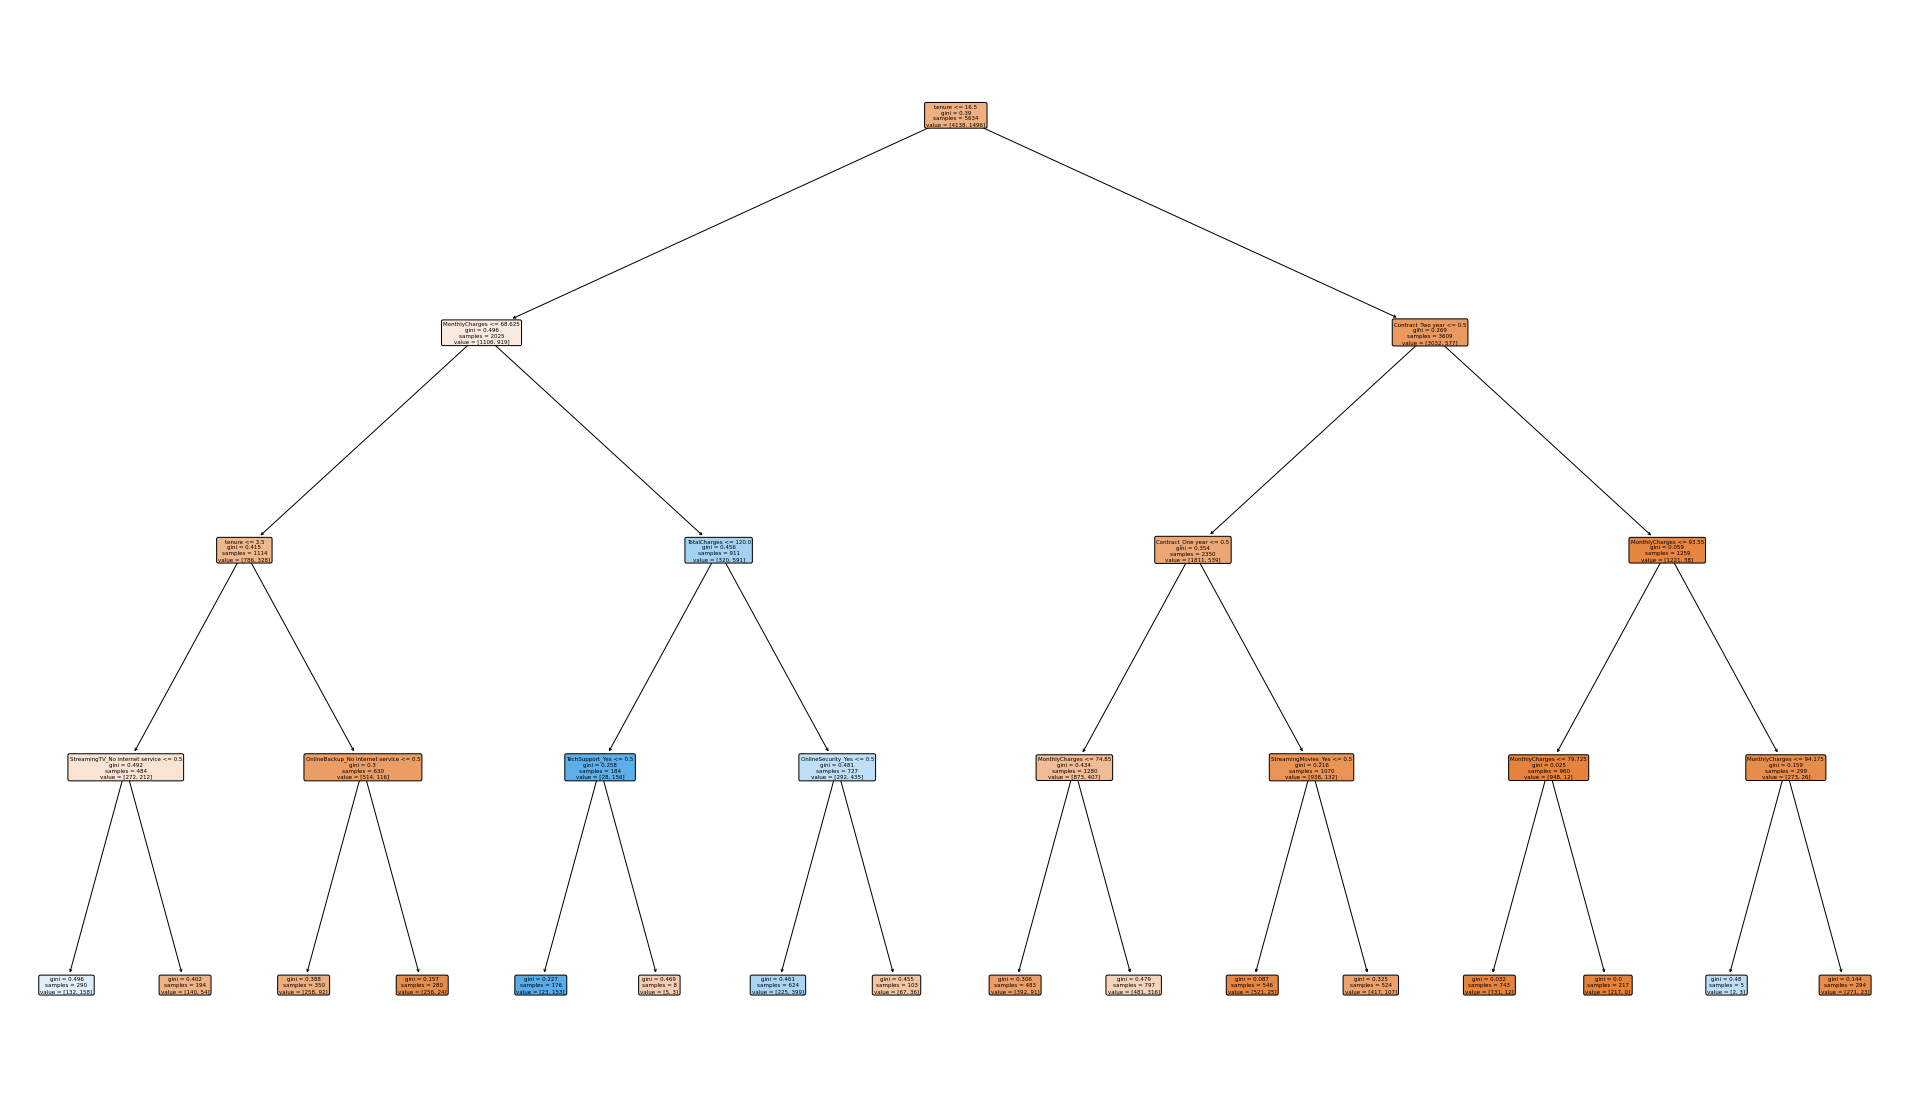

In [59]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

Feature: 0, Score: 0.07241
Feature: 1, Score: 0.12015
Feature: 2, Score: 0.01227
Feature: 3, Score: 0.01076
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01636
Feature: 6, Score: 0.00608
Feature: 7, Score: 0.01757
Feature: 8, Score: 0.00735
Feature: 9, Score: 0.00055
Feature: 10, Score: 0.01276
Feature: 11, Score: 0.01967
Feature: 12, Score: 0.03541
Feature: 13, Score: 0.01431
Feature: 14, Score: 0.21044
Feature: 15, Score: 0.00360
Feature: 16, Score: 0.01179
Feature: 17, Score: 0.01069
Feature: 18, Score: 0.06231
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.01168
Feature: 21, Score: 0.34384


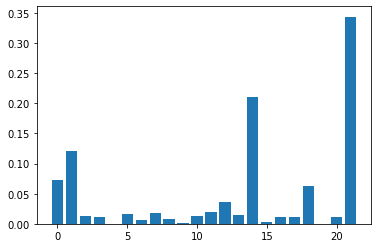

In [60]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=22, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.08666
Feature: 1, Score: 0.06694
Feature: 2, Score: 0.01640
Feature: 3, Score: 0.01532
Feature: 4, Score: 0.01508
Feature: 5, Score: 0.08415
Feature: 6, Score: 0.01419
Feature: 7, Score: 0.03458
Feature: 8, Score: 0.01616
Feature: 9, Score: 0.01632
Feature: 10, Score: 0.01888
Feature: 11, Score: 0.09359
Feature: 12, Score: 0.04453
Feature: 13, Score: 0.01592
Feature: 14, Score: 0.12012
Feature: 15, Score: 0.01654
Feature: 16, Score: 0.01539
Feature: 17, Score: 0.06708
Feature: 18, Score: 0.06299
Feature: 19, Score: 0.01587
Feature: 20, Score: 0.01769
Feature: 21, Score: 0.14561


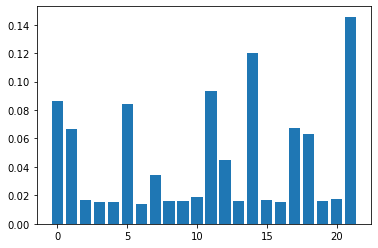

In [61]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=22, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# spliting X, y

In [62]:
X = pd.concat(([new_churnData,categoricals_features]), axis=1).drop(columns=["Churn"])
y= new_churnData["Churn"]


In [63]:
X=X[["tenure", "SeniorCitizen", "TechSupport_No internet service", "StreamingMovies_No internet service", "Contract_Two year"]]
y= new_churnData["Churn"]


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

# Logistic regresion

,Error_metric,Train,Test
0,Accuracy,0.78,0.78
1,Precision,0.62,0.62
2,Recall,0.43,0.46


Confusion matrix for the train set
[[3744  394]
 [ 851  645]]


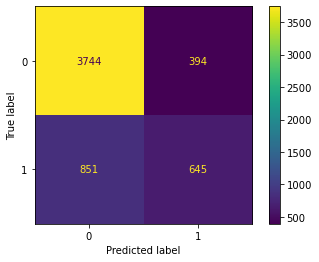



Confusion matrix for the test set
[[932 104]
 [201 172]]


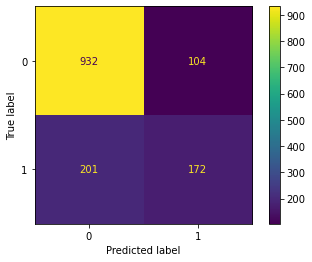

In [65]:
log_model = LogisticRegression(random_state=11) 

## Data splitting
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

# Model evaluation

In [66]:
def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    ME_train = np.mean(np.exp(y_train)-np.exp(y_pred_train))
    ME_test  = np.mean(np.exp(y_test)-np.exp(y_pred_test))

    MAE_train = mean_absolute_error(np.exp(y_train),np.exp(y_pred_train))
    MAE_test  = mean_absolute_error(np.exp(y_test),np.exp(y_pred_test))

    MSE_train = mean_squared_error(np.exp(y_train),np.exp(y_pred_train))
    MSE_test  = mean_squared_error(np.exp(y_test),np.exp(y_pred_test))

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(np.exp(y_train)-np.exp(y_pred_train)) / np.exp(y_train))* 100.)
    MAPE_test  = np.mean((np.abs(np.exp(y_test)-np.exp(y_pred_test)) / np.exp(y_test))* 100.)

    R2_train = r2_score(np.exp(y_train),np.exp(y_pred_train))
    R2_test  = r2_score(np.exp(y_test),np.exp(y_pred_test))

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': np.exp(y_train), 'Predicted': np.exp(y_pred_train)})
    df_test  = pd.DataFrame({'Real': np.exp(y_test),  'Predicted': np.exp(y_pred_test)})

    return performance, df_train, df_test

# KNN

In [67]:
# initialize model (set parameters)
neigh = KNeighborsRegressor(n_neighbors=4) # n_neighbors = K

In [68]:
neigh.fit(X_train, y_train) # Minkowski distance with p = 2 -> Euclidean distance

KNeighborsRegressor(n_neighbors=4)

# Making prediction

In [69]:
# make predictions
y_pred_train_knn = neigh.predict(X_train)
y_pred_test_knn  = neigh.predict(X_test)

performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
performance_knn

,Error_metric,Train,Test
0,Mean error,0.10,0.09
1,Mean absolute error,0.49,0.47
2,Mean squared error,0.53,0.51
3,Root mean squared error,0.73,0.71
4,Mean absolute percentual error,30.07,29.27
5,R2,0.07,0.12


In [70]:
# for loop to try many values of k

full = pd.DataFrame()

models = {'k': [] }

for k in range(2,21):

    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)

    models['k'] = [k, neigh]

    y_pred_train_knn = neigh.predict(X_train)
    y_pred_test_knn  = neigh.predict(X_test)

    performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
    temp = pd.DataFrame({'k': [k]*6, 'Error_metric': performance_knn['Error_metric'], 
                         'Train': performance_knn['Train'], 'Test': performance_knn['Test']})
    full = pd.concat([full,temp], axis=0)

full

,k,Error_metric,Train,Test
0,2,Mean error,0.10,0.09
1,2,Mean absolute error,0.49,0.47
2,2,Mean squared error,0.63,0.59
3,2,Root mean squared error,0.79,0.77
4,2,Mean absolute percentual error,30.37,28.96
5,2,R2,-0.09,-0.02
0,3,Mean error,0.10,0.09
1,3,Mean absolute error,0.48,0.47
2,3,Mean squared error,0.55,0.53
3,3,Root mean squared error,0.74,0.73


## cheking for overfit

In [71]:
full[full['Error_metric'] == 'R2']

,k,Error_metric,Train,Test
5,2,R2,-0.09,-0.02
5,3,R2,0.04,0.08
5,4,R2,0.07,0.12
5,5,R2,0.13,0.16
5,6,R2,0.13,0.16
5,7,R2,0.16,0.18
5,8,R2,0.17,0.19
5,9,R2,0.20,0.21
5,10,R2,0.20,0.21
5,11,R2,0.20,0.21


In [72]:
full2 = full.melt(id_vars=['k','Error_metric'])
full2

,k,Error_metric,variable,value
0,2,Mean error,Train,0.10
1,2,Mean absolute error,Train,0.49
2,2,Mean squared error,Train,0.63
3,2,Root mean squared error,Train,0.79
4,2,Mean absolute percentual error,Train,30.37
...,...,...,...,...
223,20,Mean absolute error,Test,0.47
224,20,Mean squared error,Test,0.44
225,20,Root mean squared error,Test,0.67
226,20,Mean absolute percentual error,Test,29.53


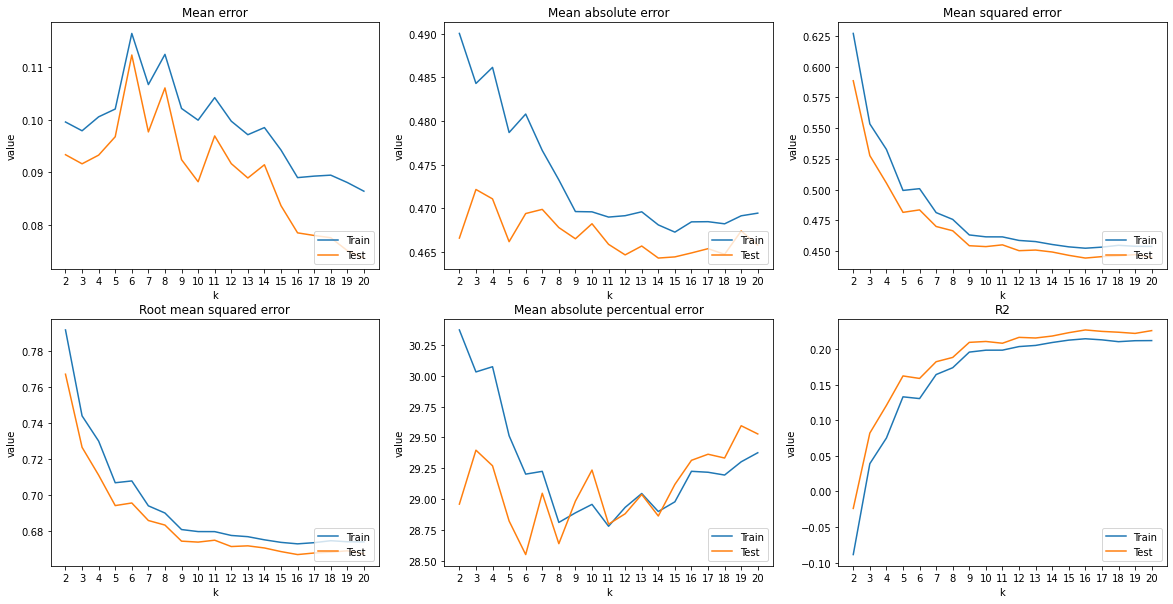

In [73]:
%matplotlib inline

#metrics = ['Mean error',]'Mean absolute error',...]

fig, ax = plt.subplots(2,3, figsize=(20,10))
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean error'], hue = 'variable', ax = ax[0,0])
ax[0,0].set_xticks(range(2,21))
ax[0,0].set_title("Mean error")
ax[0,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute error'], hue = 'variable', ax = ax[0,1])
ax[0,1].set_xticks(range(2,21))
ax[0,1].set_title("Mean absolute error")
ax[0,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean squared error'], hue = 'variable', ax = ax[0,2])
ax[0,2].set_xticks(range(2,21))
ax[0,2].set_title("Mean squared error")
ax[0,2].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Root mean squared error'], hue = 'variable', ax = ax[1,0])
ax[1,0].set_xticks(range(2,21))
ax[1,0].set_title("Root mean squared error")
ax[1,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute percentual error'], hue = 'variable', ax = ax[1,1])
ax[1,1].set_xticks(range(2,21))
ax[1,1].set_title("Mean absolute percentual error")
ax[1,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'R2'], hue = 'variable', ax = ax[1,2])
ax[1,2].set_xticks(range(2,21))
ax[1,2].set_title("R2")
ax[1,2].legend(loc='lower right')

# Decision trees

,Error_metric,Train,Test
0,Accuracy,0.77,0.78
1,Precision,0.65,0.65
2,Recall,0.32,0.36


Confusion matrix for the train set
[[3876 1019]
 [ 262  477]]


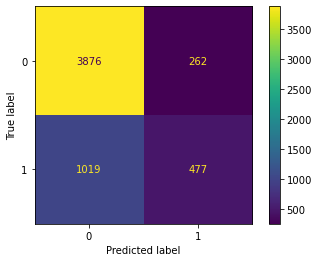



Confusion matrix for the test set
[[963 240]
 [ 73 133]]


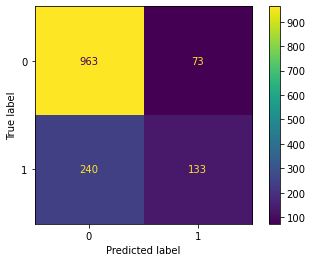

In [74]:
# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=4)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

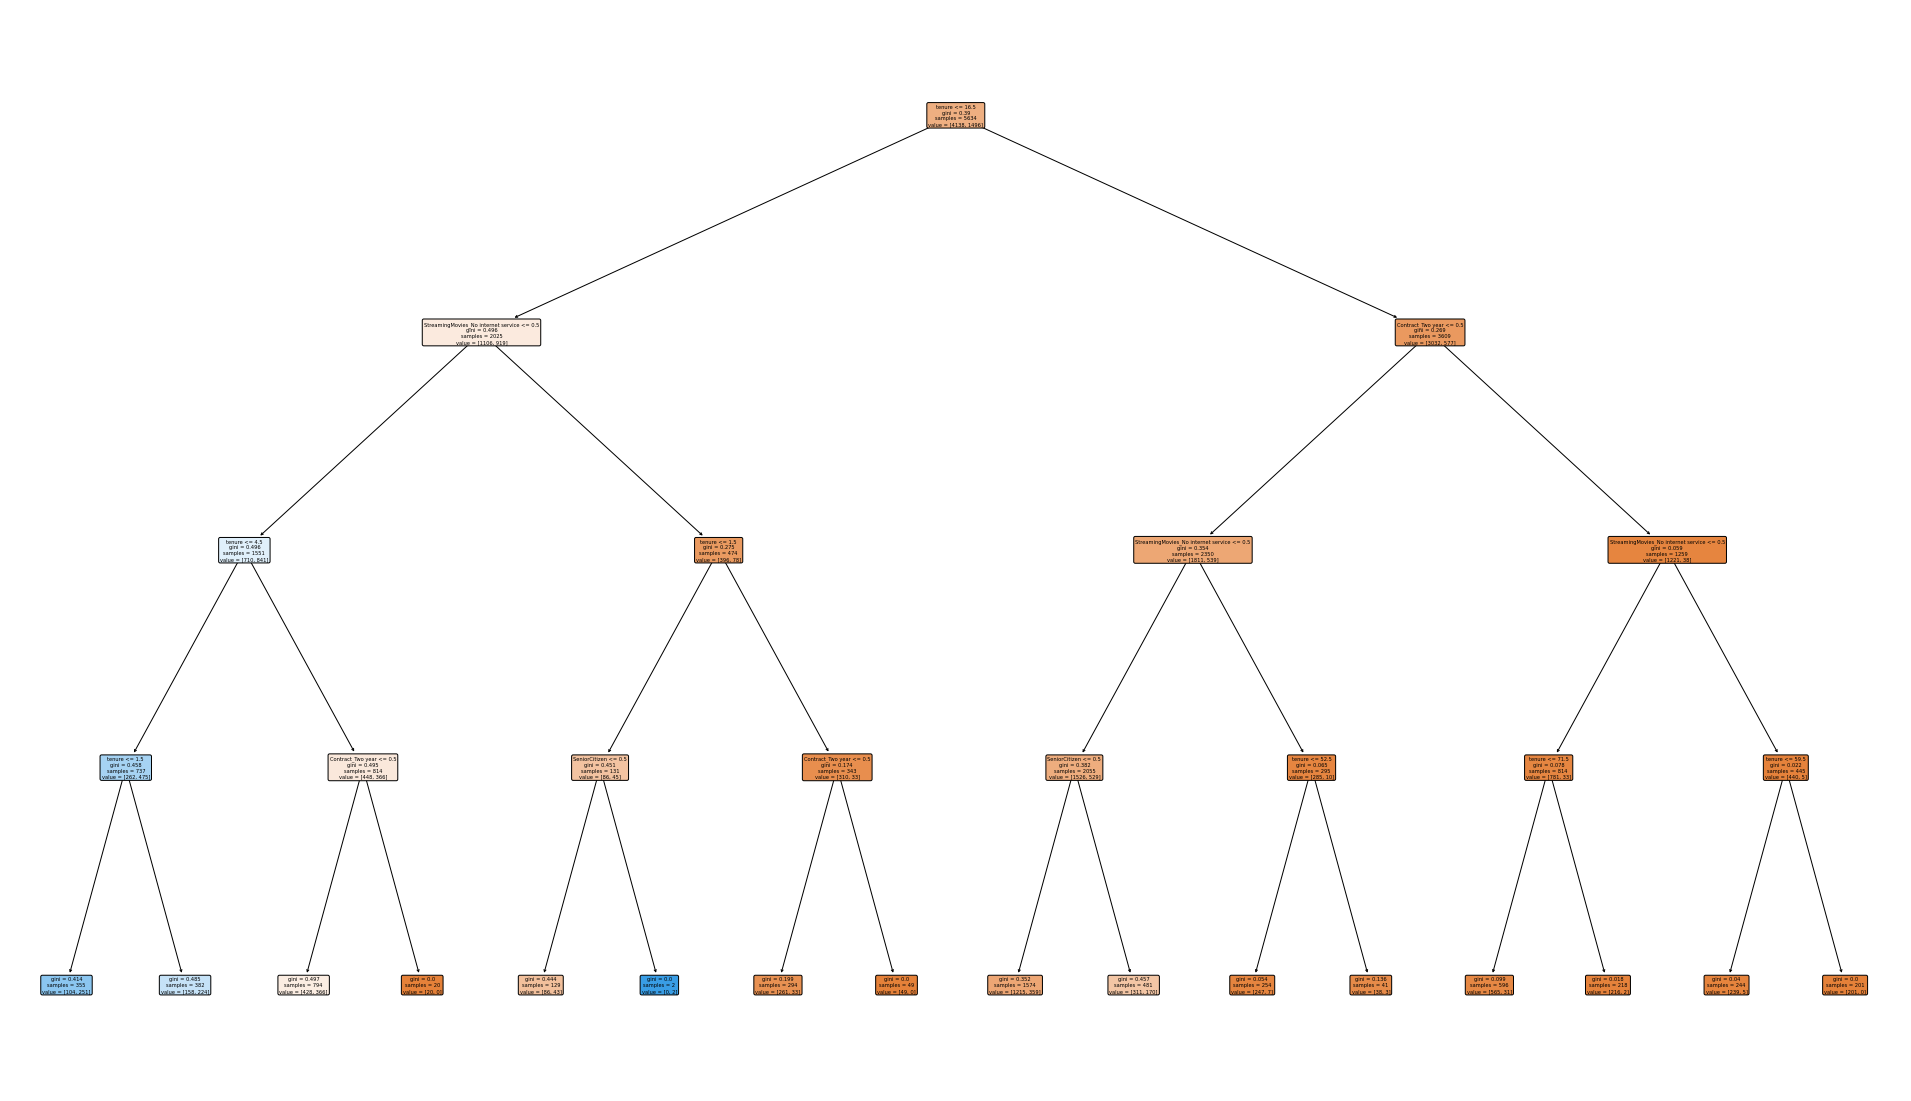

In [76]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X.columns)
plt.show() 